# Discrete Wavelet Transform
## Fire Detection

***

The following notebook contains code for generating histograms of the color channels of an image, as well as performing a Wavelet Decomposition of each channel.

***
## Library Import

Import required libraries.

In [4]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

***
## Image Import

Load an image using OpenCV.

In [5]:
test_img = cv2.imread("../data/fire_dataset/fire/fire.2.png")

***
## Histogram Generation

Create histograms for each of the RGB color channels of the image.

Note that OpenCV follows `BGR` order, an that each channel has a range of $0$ to $256$.

In [6]:
r_hist = cv2.calcHist([test_img], [2], None, [256], [0,256])
g_hist = cv2.calcHist([test_img], [1], None, [256], [0,256])
b_hist = cv2.calcHist([test_img], [0], None, [256], [0,256])

Generate a plot of the RGB color histograms (for illustrative purposes only).

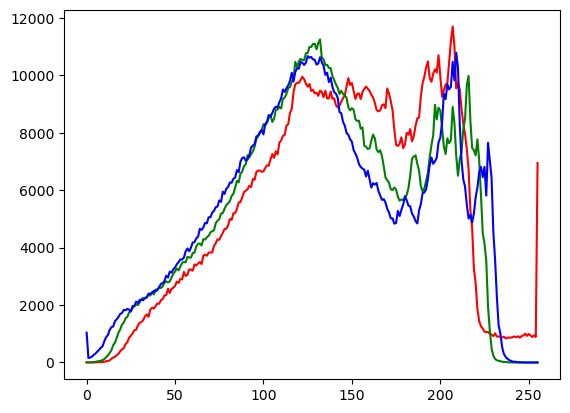

In [7]:
plt.plot(r_hist, color = "red")
plt.plot(g_hist, color = "green")
plt.plot(b_hist, color = "blue")
plt.show()

Convert the image to HSV representation.

In [8]:
test_img_hsv = cv2.cvtColor(test_img, cv2.COLOR_BGR2HSV)

Generate histograms for each HSV color channel.

Note that the range of the `H` channel is $0$ to $180$.

In [9]:
h_hist = cv2.calcHist([test_img_hsv], [0], None, [180], [0,180])
s_hist = cv2.calcHist([test_img_hsv], [1], None, [256], [0,256])
v_hist = cv2.calcHist([test_img_hsv], [2], None, [256], [0,256])

Generate a plot of the HSV color histograms (for illustrative purposes only).

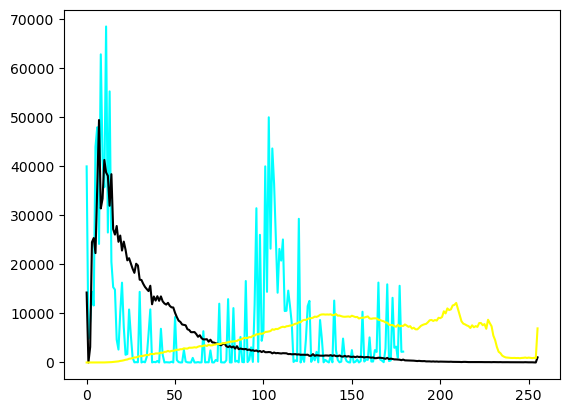

In [10]:
plt.plot(h_hist, color = "cyan")
plt.plot(s_hist, color = "black")
plt.plot(v_hist, color = "yellow")
plt.show()

Combine all histograms into a single array.

In [11]:
channel_histograms = [r_hist, g_hist, b_hist, h_hist, s_hist, v_hist]

***
## Wavelet Decomposition

Perform wavelet decomposition for each channel histogram, then generate features for each coefficient.

In [12]:
# Feature generation for wavelet coefficient.

def get_features(coefficient):

    n5 = np.nanpercentile(coefficient, 5)
    n25 = np.nanpercentile(coefficient, 25)
    n75 = np.nanpercentile(coefficient, 75)
    n95 = np.nanpercentile(coefficient, 95)

    median = np.nanpercentile(coefficient, 50)
    mean = np.nanmean(coefficient)
    std = np.nanstd(coefficient)
    var = np.nanvar(coefficient)
    rms = np.nanmean(np.sqrt(coefficient**2))

    return [n5, n25, n75, n95, median, mean, std, var, rms]

In [13]:
img_features = []

for histogram in channel_histograms:

    # Get wavelet coefficients.
    wav_coefficient = pywt.wavedec(histogram, "db1")[0]

    # Get features.
    img_features += get_features(wav_coefficient)

In [14]:
img_features

[67.75,
 1425.5,
 9183.0,
 9915.25,
 5956.0,
 5400.0,
 3655.5308,
 13362906.0,
 5400.0,
 1.0,
 2314.75,
 8265.5,
 10525.25,
 6069.0,
 5400.0,
 3475.2034,
 12077039.0,
 5400.0,
 24.25,
 2529.5,
 7836.5,
 10380.75,
 5652.5,
 5400.0,
 3197.7986,
 10225916.0,
 5400.0,
 1.950000000000001,
 77.25,
 10889.25,
 39972.35,
 1155.0,
 7680.0,
 12909.177,
 166646830.0,
 7680.0,
 49.75,
 258.0,
 4792.5,
 25493.0,
 1472.0,
 5400.0,
 8939.522,
 79915060.0,
 5400.0,
 46.25,
 1986.25,
 8472.5,
 9789.25,
 6284.5,
 5400.0,
 3425.1116,
 11731389.0,
 5400.0]